# Data Cleaning

Gets data through an API call, cleans the data and prints graphics with a PDF format

In [23]:
import pandas as pd
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
# Gets today's date
inclusion_date = f"{datetime.today().strftime('%Y-%m-%d')}"
inclusion_date = '2024-07-23'

In [29]:
# Sends a request to the API
response = requests.get(f"http://127.0.0.1:5000/people?date={inclusion_date}")
response.status_code

200

In [30]:
# Prints the response
response.text

'[{"attributes":{"age":52,"first_name":"Bob","height":192.63,"inclusion_date":"2024-07-23","last_name":"Jackson","op2_level":0.05,"p_type":"AFK","status":"Active","weight":54.43},"id":1},{"attributes":{"age":60,"first_name":"Kate","height":178.15,"inclusion_date":"2024-07-23","last_name":"Anderson","op2_level":-0.16,"p_type":"ECR","status":"Not Active","weight":46.29},"id":6},{"attributes":{"age":46,"first_name":"Bob","height":154.35,"inclusion_date":"2024-07-23","last_name":"Anderson","op2_level":0.85,"p_type":"ECR","status":"Transfering","weight":79.3},"id":21},{"attributes":{"age":69,"first_name":"Peter","height":156.6,"inclusion_date":"2024-07-23","last_name":"Anderson","op2_level":0.57,"p_type":"ECR","status":"Not Active","weight":126.88},"id":33},{"attributes":{"age":74,"first_name":"Thomas","height":194.79,"inclusion_date":"2024-07-23","last_name":"Brown","op2_level":-0.19,"p_type":"ECC","status":"Active","weight":82.39},"id":47},{"attributes":{"age":27,"first_name":"Isabella","

In [33]:
if response.status_code == 200:
    people = json.loads(response.text)
    print(people[0])

{'attributes': {'age': 52, 'first_name': 'Bob', 'height': 192.63, 'inclusion_date': '2024-07-23', 'last_name': 'Jackson', 'op2_level': 0.05, 'p_type': 'AFK', 'status': 'Active', 'weight': 54.43}, 'id': 1}


In [34]:
if response.status_code == 200:
    print(len(people))

145


In [35]:
if response.status_code == 200:
    col_names = [
        'id', 
        'first_name', 
        'last_name', 
        'age', 
        'height', 
        'weight', 
        'p_type', 
        'status', 
        'op2_level', 
        'inclusion_date'
    ]
    
    df = pd.DataFrame(columns=col_names)
    
    values = {}
    
    for name in col_names:
        values[name] = []
    
    for person in people:
        for key, value in person.items():
            if key == 'id':
                values[key].append(value)
            else:
                for att_key, att_value in value.items():
                    values[att_key].append(att_value)
    
    for name in col_names:
        df[name] = values[name]
    
    print(df)

      id first_name last_name  age  height  weight p_type       status  \
0      1        Bob   Jackson   52  192.63   54.43    AFK       Active   
1      6       Kate  Anderson   60  178.15   46.29    ECR   Not Active   
2     21        Bob  Anderson   46  154.35   79.30    ECR  Transfering   
3     33      Peter  Anderson   69  156.60  126.88    ECR   Not Active   
4     47     Thomas     Brown   74  194.79   82.39    ECC       Active   
..   ...        ...       ...  ...     ...     ...    ...          ...   
140  980     Thomas  Williams   44  161.17   57.98    AFK       Active   
141  983      Henry    Thomas   76  163.62   47.80    LAM   Not Active   
142  984      Emily     Smith   74  154.98   52.59    AFK       Active   
143  992     Thomas     Smith   60  162.23   70.93    LAM       Active   
144  994      Henry  Williams   75  189.81   50.17    LAM       Active   

     op2_level inclusion_date  
0         0.05     2024-07-23  
1        -0.16     2024-07-23  
2         0.85 

In [36]:
if response.status_code == 200:
    df = df.query("status == 'Active' & p_type.notnull()")
    df = df[['age', 'height', 'weight', 'p_type', 'op2_level']]
    print(df)

     age  height  weight p_type  op2_level
0     52  192.63   54.43    AFK       0.05
4     74  194.79   82.39    ECC      -0.19
6     60  186.27   57.53    LAM       0.27
8     33  192.52   77.16    AFK       0.27
10    49  169.60   55.14    AFK       1.43
..   ...     ...     ...    ...        ...
135   71  189.07   81.58    ECR       0.70
140   44  161.17   57.98    AFK       0.61
142   74  154.98   52.59    AFK       1.26
143   60  162.23   70.93    LAM       1.13
144   75  189.81   50.17    LAM       1.19

[76 rows x 5 columns]


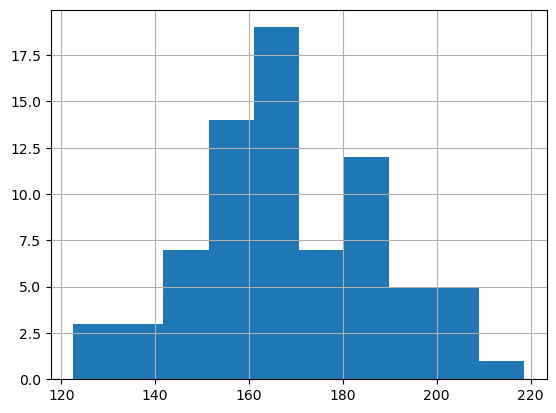

In [37]:
if response.status_code == 200:
    df['height'].hist(bins=10)

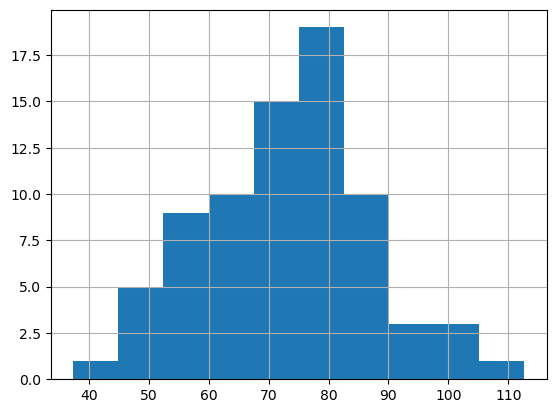

In [38]:
if response.status_code == 200:
    df['weight'].hist(bins=10)

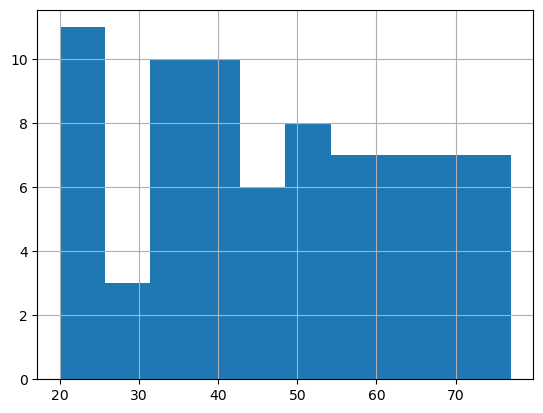

In [39]:
if response.status_code == 200:
    df['age'].hist(bins=10)

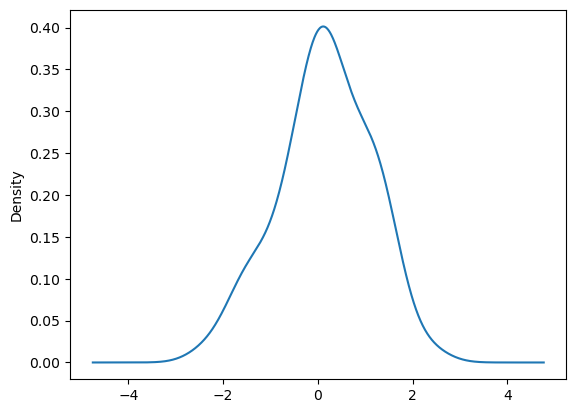

In [40]:
if response.status_code == 200:
    df['op2_level'].plot.kde()
    plt.savefig('kde.pdf')

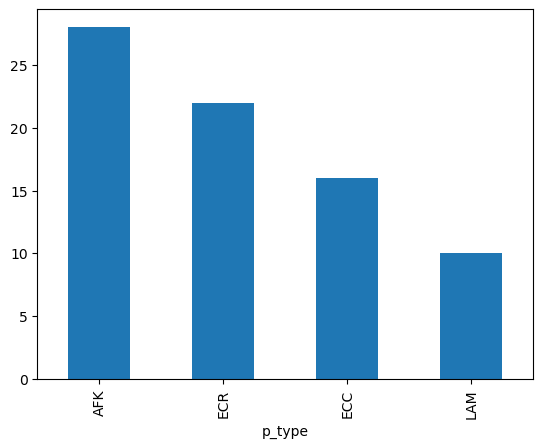

In [41]:
if response.status_code == 200:
    df_agg = df['p_type'].value_counts()
    df_agg.plot.bar()
    plt.savefig('bars.pdf')